# Proyecto Final: SERIES DE TIEMPO DEL CONSUMO ELÉCTRICO EN DOS PROVINCIAS DE LA REGIÓN ANCASH DE LA EMPRESA ADINELSA
# LUGAR: HUARAZ - ANCASH
### Semana 15
### Alumno : Escriba Flores, Daniel Agustin


---

In [1]:
#Librerias Necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_1 = pd.read_excel("ADINELSA_ANCASH.xlsx",sheet_name="HUARAZ")

# Convertir PERIODO a un formato datetime (año y mes)
df_1['PERIODO'] = pd.to_datetime(df_1['PERIODO'].astype(str), format='%Y%m')
df_1.set_index('PERIODO', inplace=True)  # Usar PERIODO como índice
print(df_1)


            CONSUMO  PROMEDIO  CANTIDAD
PERIODO                                
2023-03-01        4       4.0         1
2023-04-01        4       4.0         1
2023-05-01        4       4.0         1
2023-06-01        5       5.0         1
2023-07-01        5       5.0         1
2023-08-01        8       8.0         1
2023-09-01       30      30.0         1
2023-10-01       32      32.0         1
2023-11-01       40      40.0         1
2023-12-01       30      30.0         1
2024-01-01      263     131.5         2
2024-02-01      496     248.0         2
2024-03-01      494     247.0         2
2024-04-01      514     257.0         2
2024-05-01      507     253.5         2
2024-06-01      516     258.0         2
2024-07-01      463     231.5         2
2024-08-01      475     237.5         2
2024-09-01      511     255.5         2


In [3]:
# Media móvil no centrada
media_nocentrada = df_1['CONSUMO'].rolling(window=3, center=False).mean()
print("Media no centrada:\n", media_nocentrada)

Media no centrada:
 PERIODO
2023-03-01           NaN
2023-04-01           NaN
2023-05-01      4.000000
2023-06-01      4.333333
2023-07-01      4.666667
2023-08-01      6.000000
2023-09-01     14.333333
2023-10-01     23.333333
2023-11-01     34.000000
2023-12-01     34.000000
2024-01-01    111.000000
2024-02-01    263.000000
2024-03-01    417.666667
2024-04-01    501.333333
2024-05-01    505.000000
2024-06-01    512.333333
2024-07-01    495.333333
2024-08-01    484.666667
2024-09-01    483.000000
Name: CONSUMO, dtype: float64


In [4]:
# Media móvil centrada
media_centrada = df_1['CONSUMO'].rolling(window=3, center=True).mean()
print("Media centrada:\n", media_centrada)


Media centrada:
 PERIODO
2023-03-01           NaN
2023-04-01      4.000000
2023-05-01      4.333333
2023-06-01      4.666667
2023-07-01      6.000000
2023-08-01     14.333333
2023-09-01     23.333333
2023-10-01     34.000000
2023-11-01     34.000000
2023-12-01    111.000000
2024-01-01    263.000000
2024-02-01    417.666667
2024-03-01    501.333333
2024-04-01    505.000000
2024-05-01    512.333333
2024-06-01    495.333333
2024-07-01    484.666667
2024-08-01    483.000000
2024-09-01           NaN
Name: CONSUMO, dtype: float64


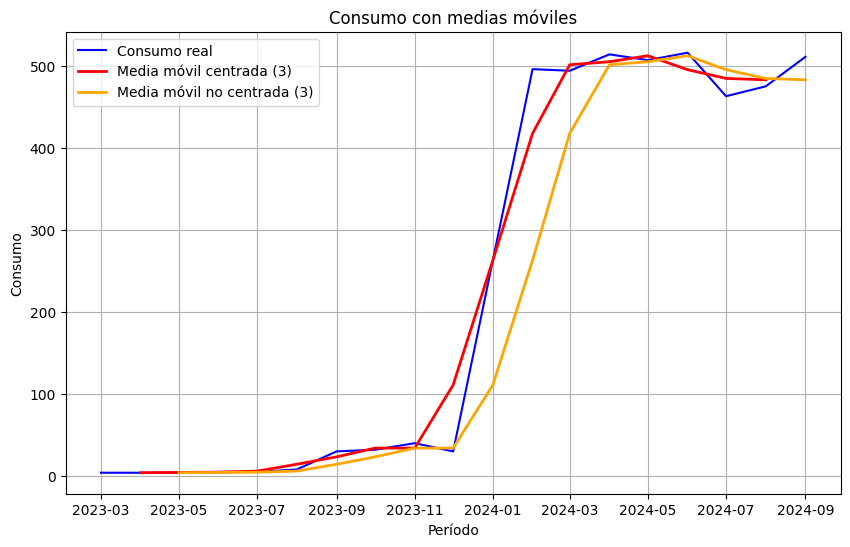

In [5]:
# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='blue')
plt.plot(media_centrada, label='Media móvil centrada (3)', color='red', linewidth=2)
plt.plot(media_nocentrada, label='Media móvil no centrada (3)', color='orange', linewidth=2)

plt.title("Consumo con medias móviles")
plt.xlabel("Período")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [6]:
# Suavización exponencial
suavizador = SimpleExpSmoothing(df_1['CONSUMO']).fit(smoothing_level=0.75, optimized=False)
suavi_exp = suavizador.fittedvalues
forecast = suavizador.forecast(2)  # Pronosticar El mes siguiente colocamos dos para ver graficamente

# Mostrar resultados
print("Valores suavizados:\n", suavi_exp)


Valores suavizados:
 PERIODO
2023-03-01      4.000000
2023-04-01      4.000000
2023-05-01      4.000000
2023-06-01      4.000000
2023-07-01      4.750000
2023-08-01      4.937500
2023-09-01      7.234375
2023-10-01     24.308594
2023-11-01     30.077148
2023-12-01     37.519287
2024-01-01     31.879822
2024-02-01    205.219955
2024-03-01    423.304989
2024-04-01    476.326247
2024-05-01    504.581562
2024-06-01    506.395390
2024-07-01    513.598848
2024-08-01    475.649712
2024-09-01    475.162428
dtype: float64


d:\TAN-S15-ST\EnvTanTsS15\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
# Imprimiendo los pronósticos para el siguiente mes
print("Pronósticos para los próximos períodos:\n", forecast)

Pronósticos para los próximos períodos:
 2024-10-01    502.040607
2024-11-01    502.040607
Freq: MS, dtype: float64


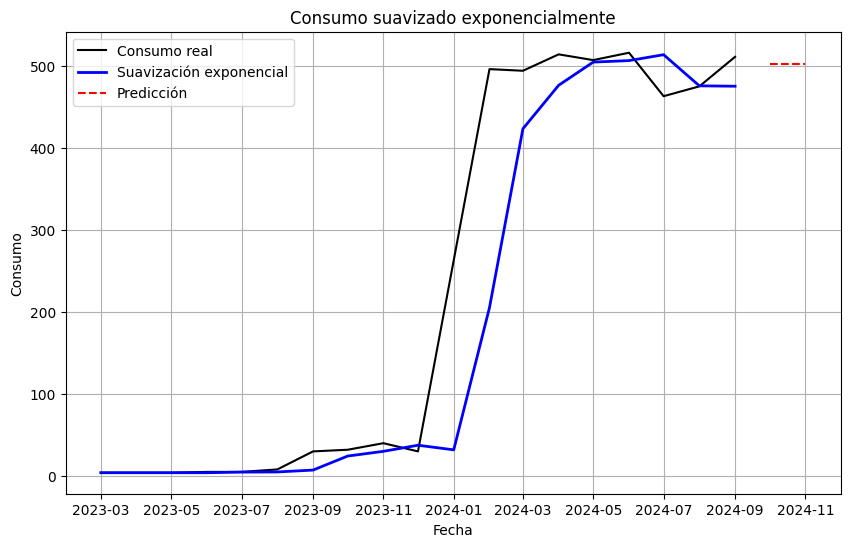

In [8]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['CONSUMO'], label='Consumo real', color='black')
plt.plot(suavi_exp, label='Suavización exponencial', color='blue', linewidth=2)
plt.plot(forecast, label='Predicción', color='red', linestyle='--')
plt.title("Consumo suavizado exponencialmente")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
# Variable de tiempo basada en índices
df_1['T'] = range(1, len(df_1) + 1)

# Regresión lineal
from sklearn.linear_model import LinearRegression

X = df_1[['T']]
y = df_1['CONSUMO']
modelo = LinearRegression().fit(X, y)

# Predicciones futuras
nuevos_t = pd.DataFrame({'T': [len(df_1) + 1, len(df_1) + 2, len(df_1) + 3]})
predicciones = modelo.predict(nuevos_t)

# Mostrar resultados
print("Intercepto:", modelo.intercept_)
print("Pendiente:", modelo.coef_[0])
print("Predicciones para los próximos períodos:", predicciones)


Intercepto: -148.84210526315783
Pendiente: 38.047368421052624
Predicciones para los próximos períodos: [612.10526316 650.15263158 688.2       ]


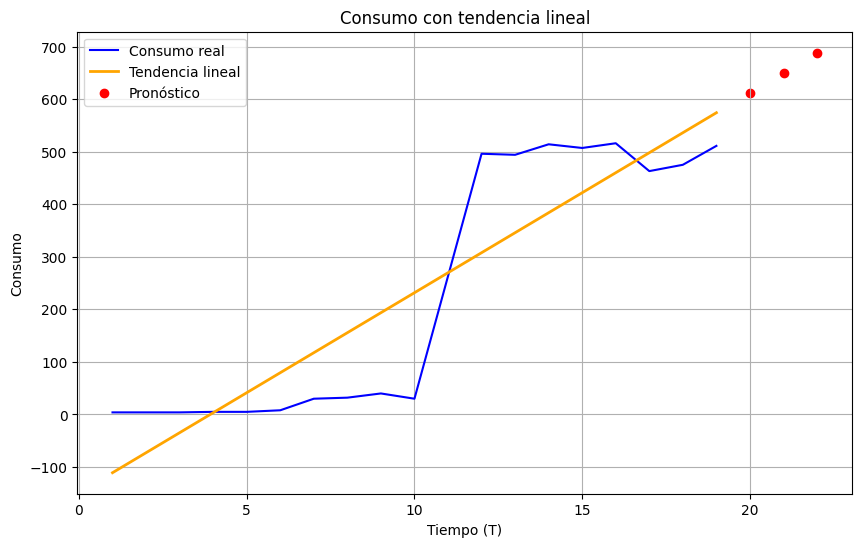

In [10]:

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_1['T'], y, label='Consumo real', color='blue')
plt.plot(df_1['T'], modelo.predict(X), label='Tendencia lineal', color='orange', linewidth=2)
plt.scatter(nuevos_t, predicciones, label='Pronóstico', color='red')
plt.title("Consumo con tendencia lineal")
plt.xlabel("Tiempo (T)")
plt.ylabel("Consumo")
plt.legend(loc='upper left')
plt.grid()
plt.show()

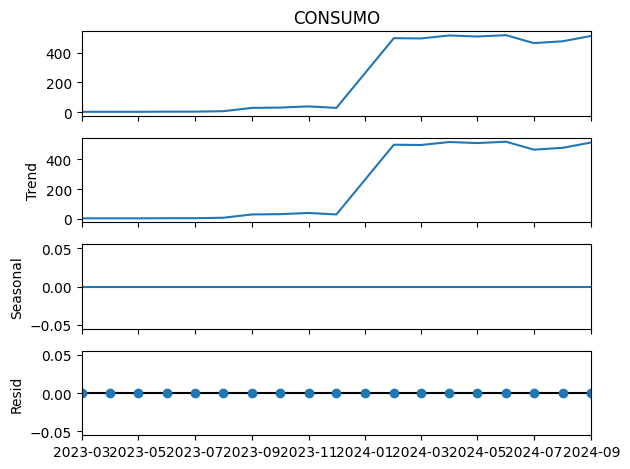

In [11]:
# Comprobamos la estacionalidad para ver si se puede trabajar a largo plazo

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_1['CONSUMO'],model='additive',period=1)
decompose.plot()
plt.show()